<a href="https://colab.research.google.com/github/r2klabs/CS430Repository/blob/main/IntroToPython.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Introduction to Python and Machine Learning
This notebook was developed to show you the basics of using Python and work with several standard data manipulation and visualization libraries.

## Importing libraries

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

## Connect to Google Drive

In [2]:
from google.colab import drive
drive.mount('/content/gdrive')

Mounted at /content/gdrive


We are going to use a data set known as Palmer's Penguins provided by Allison Horst:  https://allisonhorst.github.io/palmerpenguins/.


In [123]:
df = pd.read_csv('/content/gdrive/MyDrive/CS430/processed_penguins.csv')

In [124]:
df.head()

,study_name,species,island,clutch_completion,date_egg,bill_length_mm,bill_depth_mm,flipper_length_mm,body_mass_g,sex,delta_15,delta_13,study_day
0,PAL0708,Adelie,Torgersen,Yes,2007-11-11,39.5,17.4,186.0,3800.0,FEMALE,8.94956,-24.69454,2
1,PAL0708,Adelie,Torgersen,Yes,2007-11-16,40.3,18.0,195.0,3250.0,FEMALE,8.36821,-25.33302,7
2,PAL0708,Adelie,Torgersen,Yes,2007-11-16,36.7,19.3,193.0,3450.0,FEMALE,8.76651,-25.32426,7
3,PAL0708,Adelie,Torgersen,Yes,2007-11-16,39.3,20.6,190.0,3650.0,MALE,8.66496,-25.29805,7
4,PAL0708,Adelie,Torgersen,No,2007-11-15,38.9,17.8,181.0,3625.0,FEMALE,9.18718,-25.21799,6


## Getting Basic Statistics
When you first look at a data set, you typically want to get summary statistics on the numerical data and frequencies on categorical data. This section will introduces you to the Pandas functions to this. First, let's get the summary data for the numerical columns.

In [125]:
df.describe()

,bill_length_mm,bill_depth_mm,flipper_length_mm,body_mass_g,delta_15,delta_13,study_day
count,324.000000,324.000000,324.000000,324.000000,324.000000,324.000000,324.000000
mean,44.053395,17.127469,201.216049,4213.966049,8.739944,-25.688691,397.188272
std,5.480635,1.967385,13.958683,809.277529,0.552073,0.790840,293.819607
min,32.100000,13.100000,172.000000,2700.000000,7.632200,-27.018540,0.000000
25%,39.500000,15.575000,190.000000,3550.000000,8.304440,-26.326780,20.000000
50%,44.950000,17.300000,197.000000,4050.000000,8.658585,-25.842775,367.500000
75%,48.700000,18.600000,213.000000,4800.000000,9.181477,-25.055572,738.000000
max,59.600000,21.500000,231.000000,6300.000000,10.025440,-23.890170,753.000000


We can also look at correlations of the data.

In [126]:
df.corr()

,bill_length_mm,bill_depth_mm,flipper_length_mm,body_mass_g,delta_15,delta_13,study_day
bill_length_mm,1.000000,-0.222923,0.648947,0.591724,-0.056942,0.188517,0.018592
bill_depth_mm,-0.222923,1.000000,-0.574924,-0.470177,0.599481,0.420012,-0.034719
flipper_length_mm,0.648947,-0.574924,1.000000,0.877066,-0.501601,-0.375570,0.133971
body_mass_g,0.591724,-0.470177,0.877066,1.000000,-0.539795,-0.372041,0.014964
delta_15,-0.056942,0.599481,-0.501601,-0.539795,1.000000,0.569393,0.130083
delta_13,0.188517,0.420012,-0.375570,-0.372041,0.569393,1.000000,-0.307982
study_day,0.018592,-0.034719,0.133971,0.014964,0.130083,-0.307982,1.000000


Let's look at the frequencies of our categorical variables.

In [127]:
species = df['species'].groupby(df['species']).count()

In [128]:
island = df['island'].groupby(df['island']).count()

In [129]:
sex = df['sex'].groupby(df['sex']).count()

## Data types

### General Data Types (regardless of language/system)
- Nominal	Uses a label or name to distinguish one object from another	zip code, gender	= or not=  
- Ordinal	Using values to provide ordering of subjects	opinion, grades	< or >  
- Interval	Uses units of measurement, but the origin is arbitrary (0 does not indicate absence of something)	Celsius or Fahrenheit, calendar dates	+ or -  
- Ratio	Use units of measurement, and the origin is not arbitrary (0 does   indicate absence of something)	Temperature in kelvin, length, counts, age, income	+, -, * /  

All of your columns have data types, we can see these data types (and change them if necessary). First let's look at them.

In [130]:
df.dtypes

study_name            object
species               object
island                object
clutch_completion     object
date_egg              object
bill_length_mm       float64
bill_depth_mm        float64
flipper_length_mm    float64
body_mass_g          float64
sex                   object
delta_15             float64
delta_13             float64
study_day              int64
dtype: object

In [131]:
df.date_egg=pd.to_datetime(df.date_egg)

In [132]:
dates = df['date_egg'].groupby(df['date_egg']).count()

## Miscellaneous Pandas Functions
Here are examples of a few functions that will come in handy.  This is not exhaustive by any means.  First, let's drop some columns from the data set.

In [133]:
df.query('species=="Adelie"')

,study_name,species,island,clutch_completion,date_egg,bill_length_mm,bill_depth_mm,flipper_length_mm,body_mass_g,sex,delta_15,delta_13,study_day
0,PAL0708,Adelie,Torgersen,Yes,2007-11-11,39.5,17.4,186.0,3800.0,FEMALE,8.94956,-24.69454,2
1,PAL0708,Adelie,Torgersen,Yes,2007-11-16,40.3,18.0,195.0,3250.0,FEMALE,8.36821,-25.33302,7
2,PAL0708,Adelie,Torgersen,Yes,2007-11-16,36.7,19.3,193.0,3450.0,FEMALE,8.76651,-25.32426,7
3,PAL0708,Adelie,Torgersen,Yes,2007-11-16,39.3,20.6,190.0,3650.0,MALE,8.66496,-25.29805,7
4,PAL0708,Adelie,Torgersen,No,2007-11-15,38.9,17.8,181.0,3625.0,FEMALE,9.18718,-25.21799,6
...,...,...,...,...,...,...,...,...,...,...,...,...,...
134,PAL0910,Adelie,Dream,Yes,2009-11-13,36.6,18.4,184.0,3475.0,FEMALE,8.68744,-25.83060,735
135,PAL0910,Adelie,Dream,Yes,2009-11-17,36.0,17.8,195.0,3450.0,FEMALE,8.94332,-25.79189,739
136,PAL0910,Adelie,Dream,Yes,2009-11-17,37.8,18.1,193.0,3750.0,MALE,8.97533,-26.03495,739
137,PAL0910,Adelie,Dream,Yes,2009-11-17,36.0,17.1,187.0,3700.0,FEMALE,8.93465,-26.07081,739


In [134]:
df.rename(columns={'island':'location'},inplace=True)

In [135]:
df.drop(['study_name', 'clutch_completion','delta_15','delta_13','study_day','date_egg','location'], axis=1, inplace=True)

## Using Matplotlib to Visualize Data 
Pandas uses Matplotlib underneath the hood.  This an introduction for doing basic plots with Pandas/Matplotlib.

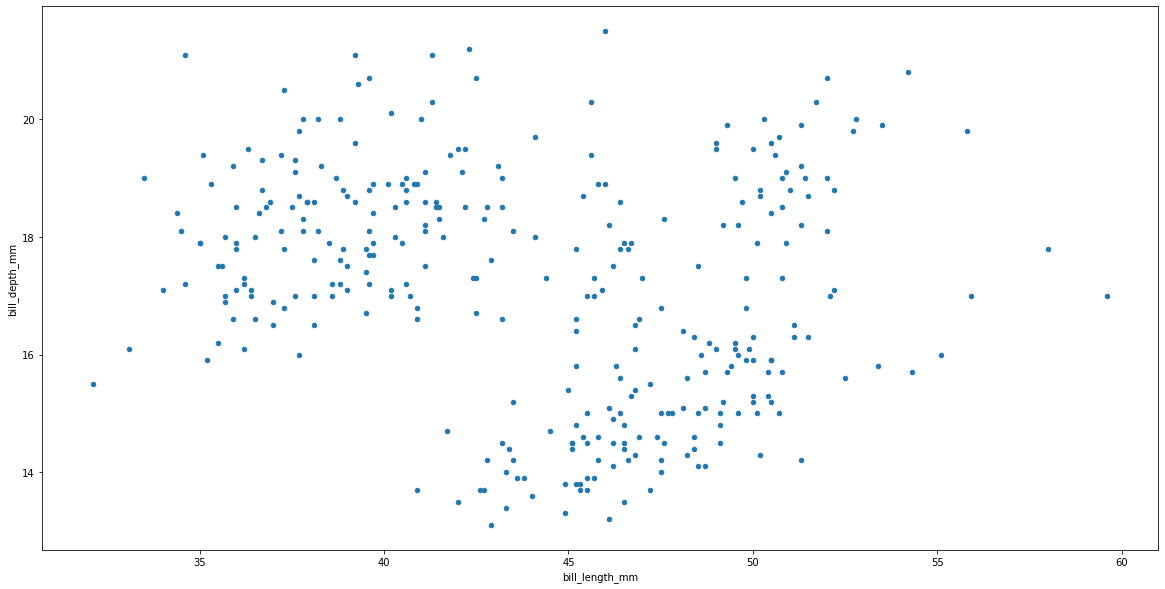

In [136]:
df.plot(kind='scatter',x='bill_length_mm',y='bill_depth_mm',figsize=(20, 10))

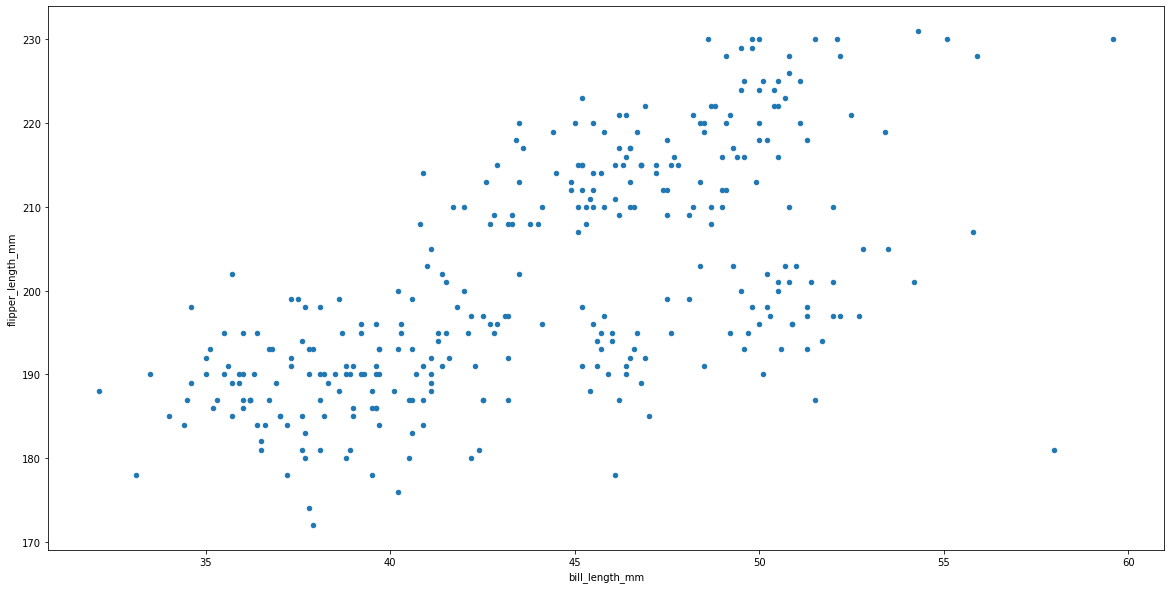

In [137]:
df.plot(kind='scatter',x='bill_length_mm',y='flipper_length_mm',figsize=(20, 10))

We can put several plots to one figure.

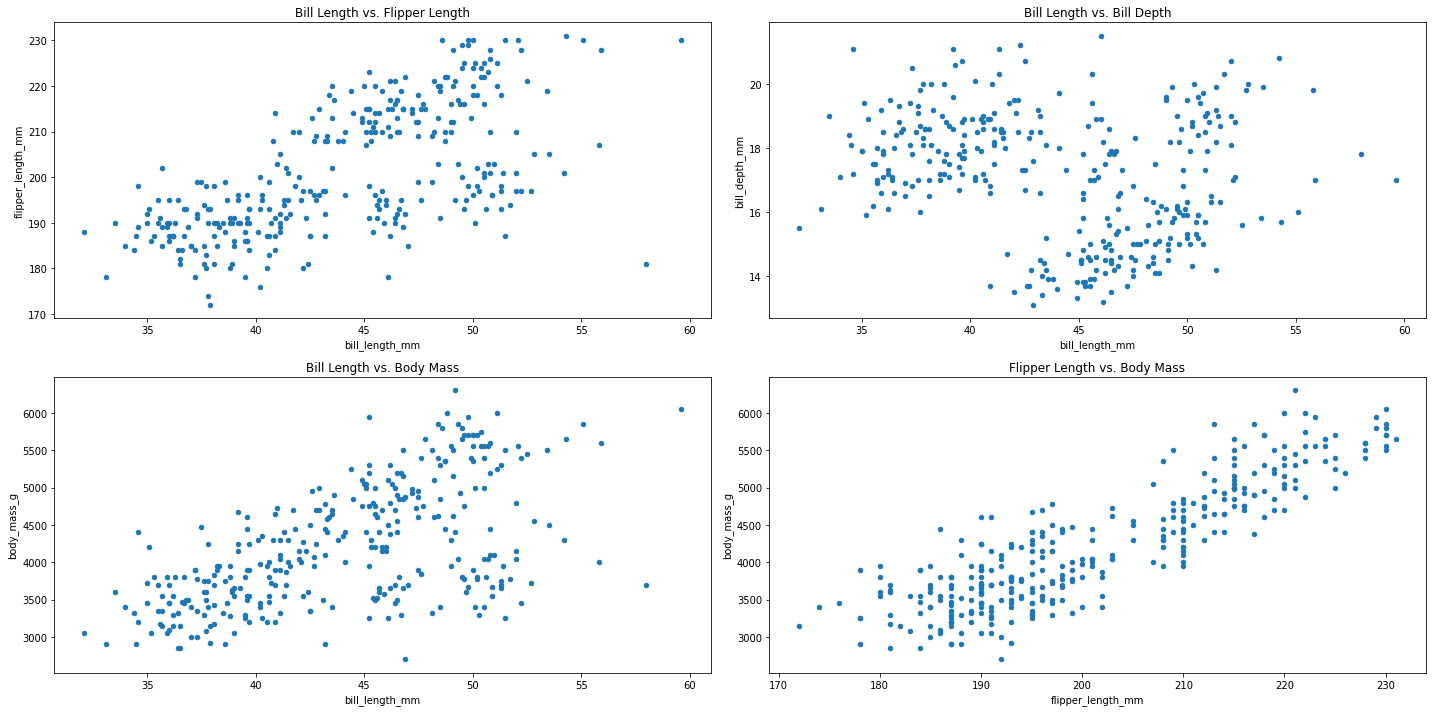

In [138]:
fig = plt.figure(figsize=(20,10))
fig.add_axes()
ax1 = fig.add_subplot(221)
ax2 = fig.add_subplot(222)
ax3 = fig.add_subplot(223)
ax4 = fig.add_subplot(224)
df.plot(kind='scatter',x='bill_length_mm',y='flipper_length_mm', title="Bill Length vs. Flipper Length", ax=ax1)
df.plot(kind='scatter',x='bill_length_mm',y='bill_depth_mm', title="Bill Length vs. Bill Depth", ax=ax2)
df.plot(kind='scatter',x='bill_length_mm', y='body_mass_g', title="Bill Length vs. Body Mass", ax=ax3)
df.plot(kind='scatter',x='flipper_length_mm', y='body_mass_g', title="Flipper Length vs. Body Mass", ax=ax4)
fig.tight_layout()

Here are some bar graphs all put into one figure

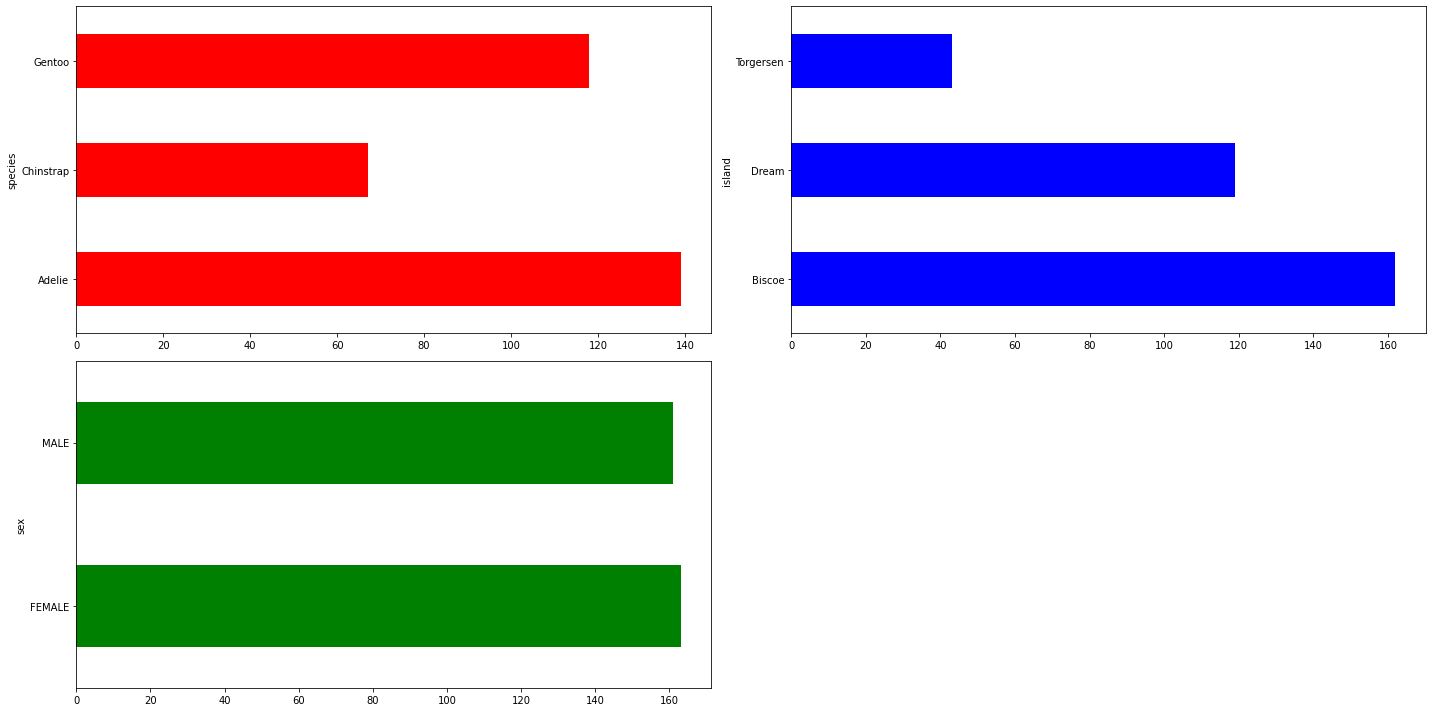

In [139]:
fig = plt.figure(figsize=(20,10))
fig.add_axes()
ax1 = fig.add_subplot(221)
ax2 = fig.add_subplot(222)
ax3 = fig.add_subplot(223)
species.plot(kind='barh', color='red', ax=ax1)
island.plot(kind='barh', color='blue',ax=ax2)
sex.plot(kind='barh', color='green', ax=ax3)
fig.tight_layout()

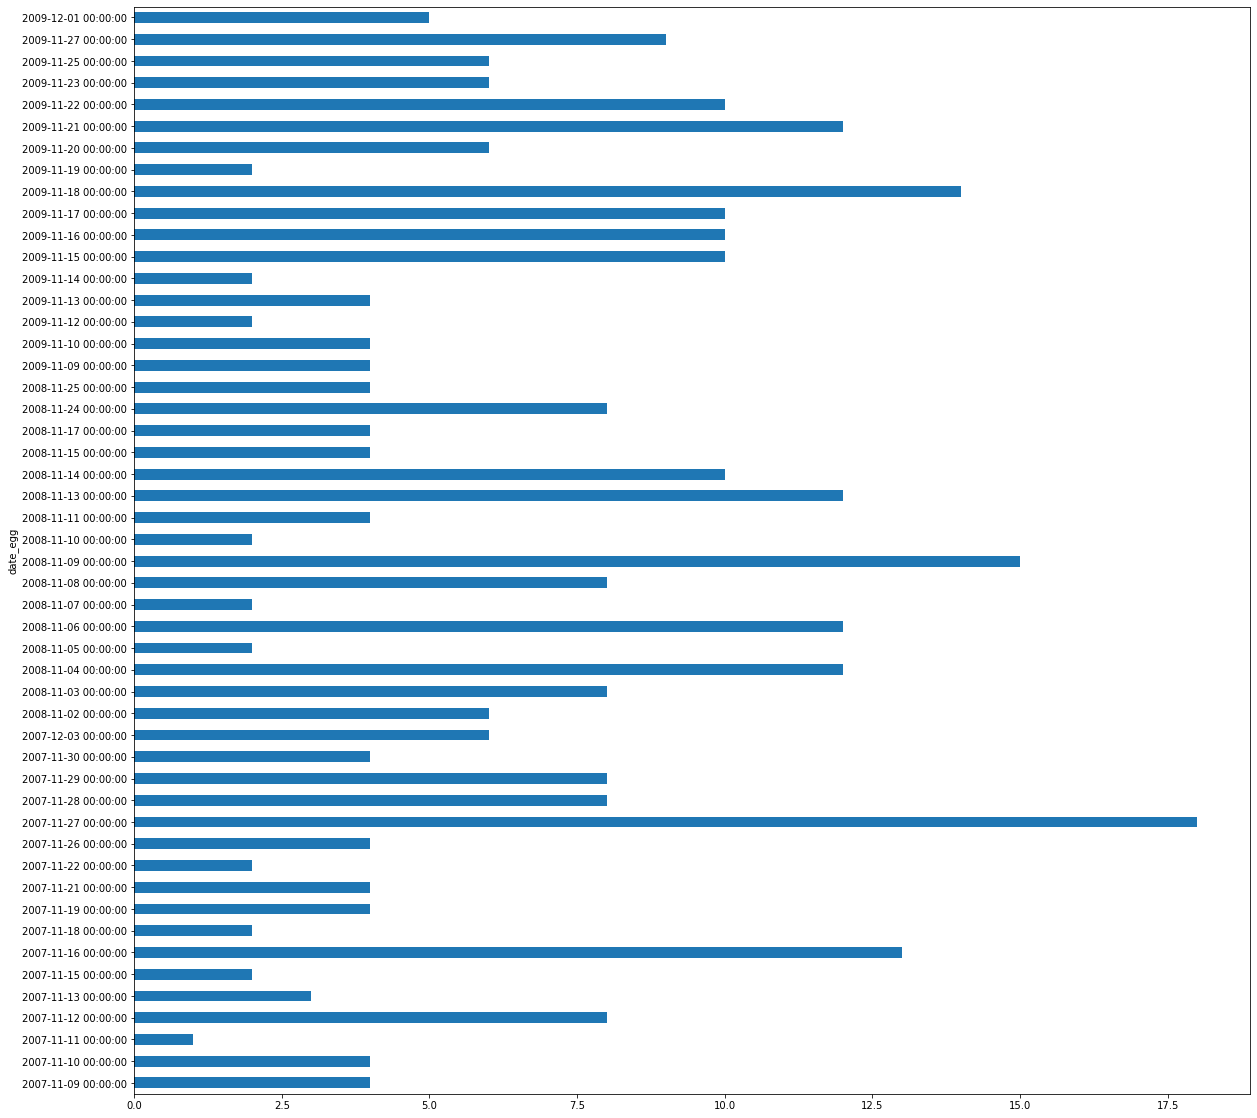

In [140]:
fig = plt.figure(figsize=(20,20))
dates.plot(kind='barh')

## Using Seaborn to Visualize Data
Seaborn is built on top of Matplotlib. Some plots/graphs/charts are easier to create with Seaborn.

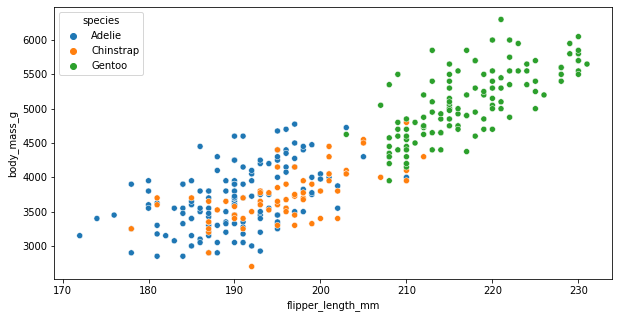

In [141]:
fig = plt.figure(figsize=(10,5))
sns.scatterplot( x="flipper_length_mm", y="body_mass_g", data=df, hue='species')

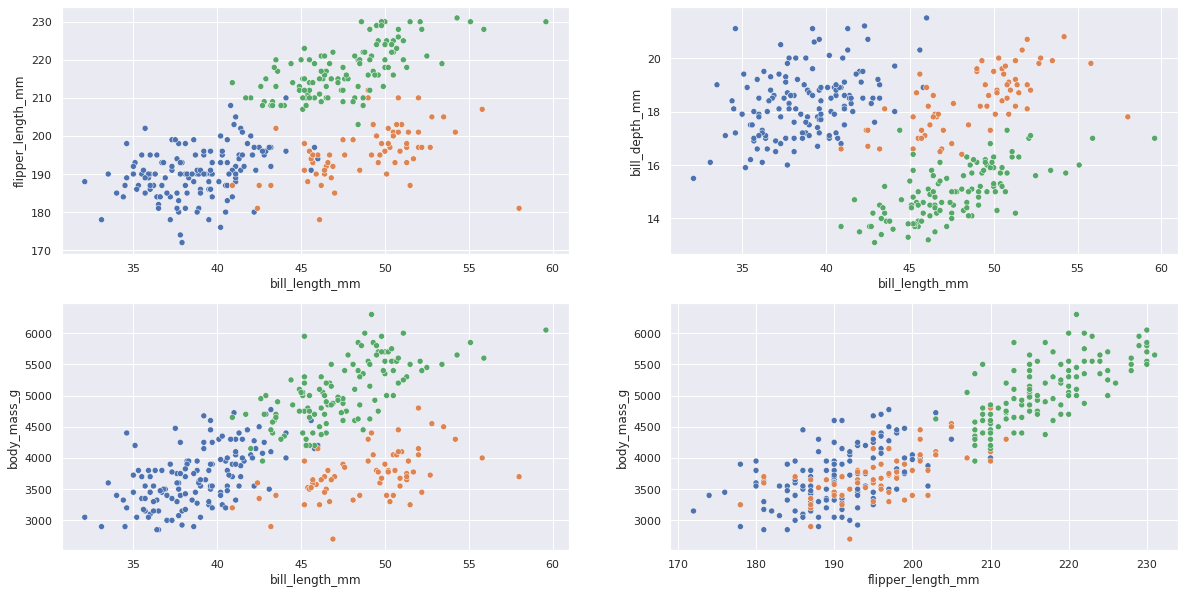

In [142]:
sns.set(rc={"figure.figsize":(20, 10)}) 
fig, axes = plt.subplots(2,2)
sns.scatterplot(x='bill_length_mm',y='flipper_length_mm', data=df,  hue='species', legend=False, ax=axes[0,0])
sns.scatterplot(x='bill_length_mm',y='bill_depth_mm', data=df,  hue='species', legend=False, ax=axes[0,1])
sns.scatterplot(x='bill_length_mm', y='body_mass_g', data=df,  hue='species', legend=False, ax=axes[1,0])
sns.scatterplot(x='flipper_length_mm', y='body_mass_g', data=df, hue='species', legend=False, ax=axes[1,1])


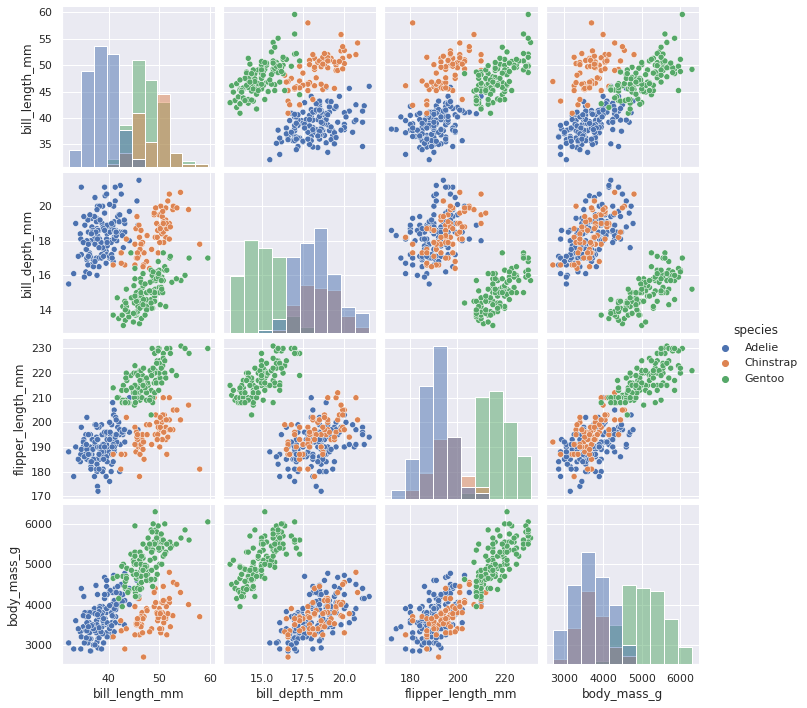

In [143]:
sns.pairplot(df,hue="species",diag_kind="hist")

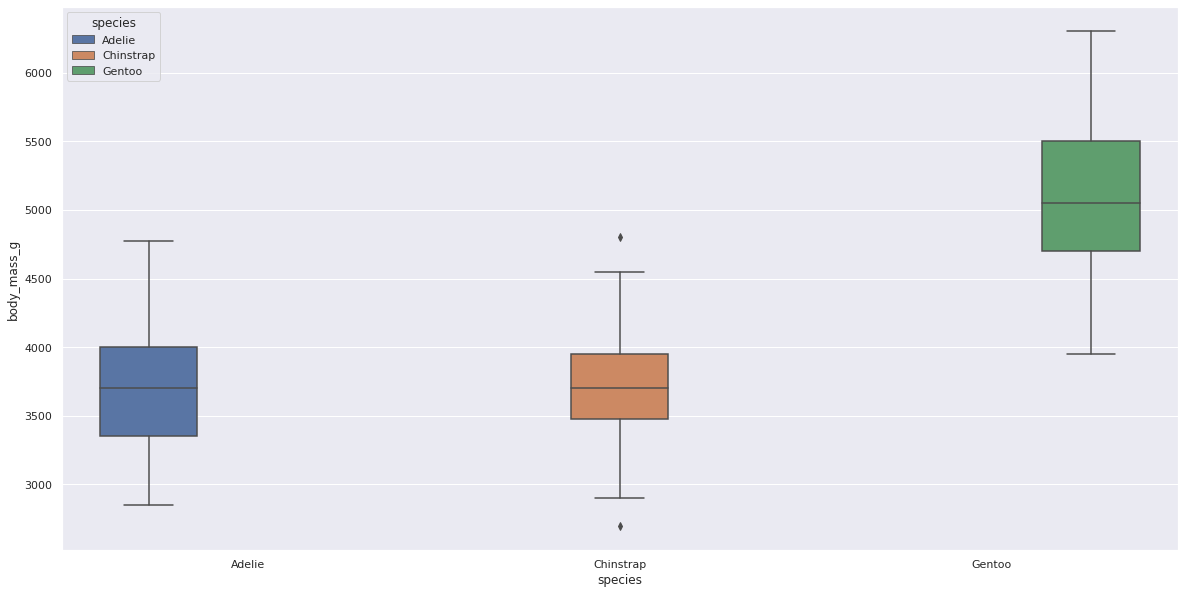

In [144]:
fig = plt.figure(figsize=(20,10))
sns.boxplot( x="species", y='body_mass_g', data=df, hue='species')

## Preparing the data set for an ML algorithm
The Penguin Data Set doesn't have many of the problems of a typical data set because it has already been cleaned and maintained.  Therefore, we are going to use a different data set from the UCI Machine Learning repository called the **Bank Marketing**. 

https://archive-beta.ics.uci.edu/ml/datasets/bank+marketing

This data set has a combination of categorical and numerical attributes that will allow us to perform some transformations.  Here is a summary of the data set from the UCI website.

### bank client data:
   1 - age (numeric)  
   2 - job : type of job (categorical: "admin.","unknown","unemployed","management","housemaid","entrepreneur","student","blue-collar","self-employed","retired","technician","services")   
   3 - marital : marital status (categorical: "married","divorced","single"; note: "divorced" means divorced or widowed)  
   4 - education (categorical: "unknown","secondary","primary","tertiary")  
   5 - default: has credit in default? (binary: "yes","no")  
   6 - balance: average yearly balance, in euros (numeric)   
   7 - housing: has housing loan? (binary: "yes","no")  
   8 - loan: has personal loan? (binary: "yes","no")  
### Related with the last contact of the current campaign:
   9 - contact: contact communication type (categorical: "unknown","telephone","cellular")   
  10 - day: last contact day of the month (numeric)  
  11 - month: last contact month of year (categorical: "jan", "feb", "mar", ..., "nov", "dec")   
  12 - duration: last contact duration, in seconds (numeric)
### Other attributes:
  13 - campaign: number of contacts performed during this campaign and for this client (numeric, includes last contact)  
  14 - pdays: number of days that passed by after the client was last contacted from a previous campaign (numeric, -1 means client was not previously contacted)  
  15 - previous: number of contacts performed before this campaign and for this client (numeric)  
  16 - poutcome: outcome of the previous marketing campaign (categorical: "unknown","other","failure","success")  

### Output variable (desired target):
**17 - y - has the client subscribed a term deposit? (binary: "yes","no")**      

In [145]:
#Using the separator parameter because this data is separated by semicolons
df = pd.read_csv('/content/gdrive/MyDrive/CS430/bank-full.csv', sep=';')  

In [146]:
df.head()

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,y
0,58,management,married,tertiary,no,2143,yes,no,unknown,5,may,261,1,-1,0,unknown,no
1,44,technician,single,secondary,no,29,yes,no,unknown,5,may,151,1,-1,0,unknown,no
2,33,entrepreneur,married,secondary,no,2,yes,yes,unknown,5,may,76,1,-1,0,unknown,no
3,47,blue-collar,married,unknown,no,1506,yes,no,unknown,5,may,92,1,-1,0,unknown,no
4,33,unknown,single,unknown,no,1,no,no,unknown,5,may,198,1,-1,0,unknown,no


In [147]:
df.describe()

,age,balance,day,duration,campaign,pdays,previous
count,45211.000000,45211.000000,45211.000000,45211.000000,45211.000000,45211.000000,45211.000000
mean,40.936210,1362.272058,15.806419,258.163080,2.763841,40.197828,0.580323
std,10.618762,3044.765829,8.322476,257.527812,3.098021,100.128746,2.303441
min,18.000000,-8019.000000,1.000000,0.000000,1.000000,-1.000000,0.000000
25%,33.000000,72.000000,8.000000,103.000000,1.000000,-1.000000,0.000000
50%,39.000000,448.000000,16.000000,180.000000,2.000000,-1.000000,0.000000
75%,48.000000,1428.000000,21.000000,319.000000,3.000000,-1.000000,0.000000
max,95.000000,102127.000000,31.000000,4918.000000,63.000000,871.000000,275.000000


In [148]:
df.isnull().sum()

age          0
job          0
marital      0
education    0
default      0
balance      0
housing      0
loan         0
contact      0
day          0
month        0
duration     0
campaign     0
pdays        0
previous     0
poutcome     0
y            0
dtype: int64

There doesn't appear to be any missing data. Therefore we don't need to do anything. If there were missing data, we would need to handle it. You will see this in other data sets later in the course.  Let's look at the data types.

In [149]:
df.dtypes

age           int64
job          object
marital      object
education    object
default      object
balance       int64
housing      object
loan         object
contact      object
day           int64
month        object
duration      int64
campaign      int64
pdays         int64
previous      int64
poutcome     object
y            object
dtype: object

Let's look at the categorical values for a few of the columns.

In [150]:
df.job.groupby(df.job).count()

job
admin.           5171
blue-collar      9732
entrepreneur     1487
housemaid        1240
management       9458
retired          2264
self-employed    1579
services         4154
student           938
technician       7597
unemployed       1303
unknown           288
Name: job, dtype: int64

In [151]:
df.marital.groupby(df.marital).count()

marital
divorced     5207
married     27214
single      12790
Name: marital, dtype: int64

We won't be able to feed these data to a machine learning algorithm because they typically require numerical data.  Let's recode them using an ordinal encoder. 

In [152]:
from sklearn.preprocessing import OrdinalEncoder

In [153]:
ordinal_encoder = OrdinalEncoder()
job_cat = df[['job']]
job_encoded = ordinal_encoder.fit_transform(job_cat)

In [154]:
job_encoded[:10]

array([[ 4.],
       [ 9.],
       [ 2.],
       [ 1.],
       [11.],
       [ 4.],
       [ 4.],
       [ 2.],
       [ 5.],
       [ 9.]])

This won't work though - jobs don't have a distance between them (admin is not necessarily lower than blue-collar).  What we really need is one-hot encoding. Let's try that.

In [155]:
from sklearn.preprocessing import OneHotEncoder

In [156]:
onehot_encoder = OneHotEncoder()
job_encoded = onehot_encoder.fit_transform(job_cat)

In [157]:
job_encoded.toarray()

array([[0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 1., 0., 0.],
       [0., 0., 1., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 1., 0., ..., 0., 0., 0.],
       [0., 0., 1., ..., 0., 0., 0.]])

In [158]:
onehot_encoder.categories_

[array(['admin.', 'blue-collar', 'entrepreneur', 'housemaid', 'management',
        'retired', 'self-employed', 'services', 'student', 'technician',
        'unemployed', 'unknown'], dtype=object)]

In [159]:
marital_cat = df[['marital']]
marital_encoded = onehot_encoder.fit_transform(marital_cat)

In [160]:
marital_encoded.toarray()

array([[0., 1., 0.],
       [0., 0., 1.],
       [0., 1., 0.],
       ...,
       [0., 1., 0.],
       [0., 1., 0.],
       [0., 1., 0.]])

Another option for preparing the data is to scale numerical values. Typically, ML aglorithms have a difficult time working with numerical data on different scales.  Let's see how this works for one column of data.

In [161]:
from sklearn.preprocessing import StandardScaler
standard_scaler = StandardScaler()
age = df[['age']]

age_scaled = standard_scaler.fit_transform(age)

In [162]:
age_scaled

array([[ 1.60696496],
       [ 0.28852927],
       [-0.74738448],
       ...,
       [ 2.92540065],
       [ 1.51279098],
       [-0.37068857]])

We could also use the MinMaxScaler which compresses values between 0 and 1. Let's use this - most ML algorithms expect this.

In [163]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
duration = df[['duration']]
duration_scaled = scaler.fit_transform(duration)

In [164]:
duration_scaled

array([[0.05307035],
       [0.03070354],
       [0.01545344],
       ...,
       [0.22915819],
       [0.10329402],
       [0.07340382]])

None of these transformations have been applied to the original data set. We'll do that next after the split. 

Let's fix the outcome column before we do anything else. I don't like the name and the encoding is in words, I want to set to 1 (positive class) or 0 (negative class).

In [165]:
df.rename(columns={"y": "outcome"}, inplace=True)

In [166]:
df['outcome'] = df['outcome'].apply(lambda x: 1 if x == "yes" else 0)

In [167]:
df.outcome.groupby(df.outcome).count()

outcome
0    39922
1     5289
Name: outcome, dtype: int64

### Splitting the data into test and train
SKLearn provides a class that will split your data into train and test so you don't have to do it manually. We are going to split the data first, then build a transformation pipeline that we can apply over both sets.  I'll import the SKLearn class to do this and split the data into X (which is the input variables) and y, which is the target variable.

In [168]:
from sklearn.model_selection import train_test_split
X = df.iloc[:,0:-1]
y = df[['outcome']]

Now we can do the split.

In [169]:
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size=.20, random_state=32)

Now we have two sets of data, one to train the model and one to test the model.  Now, let's create a pipeline we can use to apply transformations over both.  Let's take a look at what we have.

In [170]:
X_train.head()

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome
44053,29,services,single,secondary,no,0,no,no,unknown,1,jul,12,1,514,3,failure
44428,34,admin.,married,tertiary,no,69,no,yes,cellular,4,aug,120,3,1,6,success
6976,51,technician,divorced,secondary,no,0,yes,no,unknown,28,may,463,2,-1,0,unknown
19826,36,management,married,tertiary,no,369,no,no,cellular,8,aug,75,2,-1,0,unknown
20149,32,management,divorced,tertiary,no,787,yes,no,cellular,11,aug,72,2,-1,0,unknown


In [171]:
X_test.head()

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome
16710,39,blue-collar,married,unknown,no,0,no,no,cellular,24,jul,90,3,-1,0,unknown
37245,25,technician,single,tertiary,no,1954,yes,yes,cellular,13,may,66,1,351,1,failure
24255,54,blue-collar,married,primary,no,2440,no,yes,cellular,17,nov,334,1,-1,0,unknown
18849,52,unknown,married,unknown,no,1571,no,no,cellular,4,aug,164,1,-1,0,unknown
7402,33,technician,married,secondary,no,1844,yes,no,unknown,29,may,241,3,-1,0,unknown


## Transforming the Columns

Let's transform the columns using the MinMaxScaler and the OneHotEncoder.

In [172]:
from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer

Determine which attributes are numerical versus for categorical for the pipeline.

In [173]:
num_attribs = ['age','balance','day','duration','campaign','pdays','previous']
cat_attribs = ['job','marital','education','default','housing','loan','contact','month','poutcome']

Set up a transformer to apply to train and test.

In [174]:
col_transform = ColumnTransformer(transformers=[
                               ('cat',OneHotEncoder(), cat_attribs),
                               ('num',MinMaxScaler(), num_attribs),]
                  )


In [176]:
from sklearn.neighbors import KNeighborsClassifier

In [177]:
pipeline = Pipeline([
                     ('trans', col_transform),
                     ('clf', KNeighborsClassifier(n_neighbors=3)),
                     ])

Let's view the pipeline before we run it. We  do this with sklearn set_config.

In [178]:
from sklearn import set_config
set_config(display='diagram')
pipeline

Pipeline(steps=[('trans',
                 ColumnTransformer(transformers=[('cat', OneHotEncoder(),
                                                  ['job', 'marital',
                                                   'education', 'default',
                                                   'housing', 'loan', 'contact',
                                                   'month', 'poutcome']),
                                                 ('num', MinMaxScaler(),
                                                  ['age', 'balance', 'day',
                                                   'duration', 'campaign',
                                                   'pdays', 'previous'])])),
                ('clf', KNeighborsClassifier(n_neighbors=3))])

In [179]:
pipeline.fit(X_train, np.ravel(y_train))

Pipeline(steps=[('trans',
                 ColumnTransformer(transformers=[('cat', OneHotEncoder(),
                                                  ['job', 'marital',
                                                   'education', 'default',
                                                   'housing', 'loan', 'contact',
                                                   'month', 'poutcome']),
                                                 ('num', MinMaxScaler(),
                                                  ['age', 'balance', 'day',
                                                   'duration', 'campaign',
                                                   'pdays', 'previous'])])),
                ('clf', KNeighborsClassifier(n_neighbors=3))])

**np.ravel** transposes a columnar dataframe to an Numpy array. The algorithm needs it in this format to work.

In [180]:
y_pred1 = pipeline.predict(X_test)

In [181]:
y_pred1

array([0, 0, 0, ..., 0, 0, 0])

## Using Gridsearch
You can use Gridsearach to try different combinations of parameters to see which is best.

In [70]:
parameters = {'clf__n_neighbors':[3,5,7,10],
              'clf__weights':['uniform','distance'],
              'clf__leaf_size':[15,20]}

In [71]:
from sklearn.model_selection import GridSearchCV

In [72]:
grid_pipeline = GridSearchCV(pipeline, param_grid=parameters,scoring='accuracy',cv=5)

In [73]:
grid_pipeline

GridSearchCV(cv=5,
             estimator=Pipeline(steps=[('trans',
                                        ColumnTransformer(transformers=[('cat',
                                                                         OneHotEncoder(),
                                                                         ['job',
                                                                          'marital',
                                                                          'education',
                                                                          'default',
                                                                          'housing',
                                                                          'loan',
                                                                          'contact',
                                                                          'month',
                                                                          'poutcome']),
                                                                        ('num',
                                                                         MinMaxScaler(),
                                                                         ['age',
                                                                          'balance',
                                                                          'day',
                                                                          'duration',
                                                                          'campaign',
                                                                          'pdays',
                                                                          'previous'])])),
                                       ('clf',
                                        KNeighborsClassifier(n_neighbors=3))]),
             param_grid={'clf__leaf_size': [15, 20],
                         'clf__n_neighbors': [3, 5, 7, 10],
                         'clf__weights': ['uniform', 'distance']},
             scoring='accuracy')

Let's run it - it will take a few minutes.

In [74]:
grid_pipeline.fit(X_train, np.ravel(y_train))

GridSearchCV(cv=5,
             estimator=Pipeline(steps=[('trans',
                                        ColumnTransformer(transformers=[('cat',
                                                                         OneHotEncoder(),
                                                                         ['job',
                                                                          'marital',
                                                                          'education',
                                                                          'default',
                                                                          'housing',
                                                                          'loan',
                                                                          'contact',
                                                                          'month',
                                                                          'poutcome']),
                                                                        ('num',
                                                                         MinMaxScaler(),
                                                                         ['age',
                                                                          'balance',
                                                                          'day',
                                                                          'duration',
                                                                          'campaign',
                                                                          'pdays',
                                                                          'previous'])])),
                                       ('clf',
                                        KNeighborsClassifier(n_neighbors=3))]),
             param_grid={'clf__leaf_size': [15, 20],
                         'clf__n_neighbors': [3, 5, 7, 10],
                         'clf__weights': ['uniform', 'distance']},
             scoring='accuracy')

In [ ]:
grid_pipeline.best_params_

{'clf__leaf_size': 15, 'clf__n_neighbors': 10, 'clf__weights': 'uniform'}

In [ ]:
grid_pipeline.score(X_train, np.ravel(y_train))

0.9001050652510506

## Evaluating A Machine Learning Model
We are going to evaluate this model using a confusion matrix and several useful measures.

In [75]:
from sklearn.metrics import confusion_matrix

In [184]:
confusion_matrix(y_test,y_pred1)

array([[7731,  278],
       [ 740,  294]])

Here is a function to create this graphically so it's easier to see.

In [188]:
def plot_cm(y_test, y_pred):
    cm = confusion_matrix(y_test,y_pred)
    fig = plt.figure(figsize=(5,5))
    heatmap = sns.heatmap(cm, annot=True, fmt='.2f', cmap='RdYlGn')
    plt.ylabel('True label')
    plt.xlabel('Predicted Label')

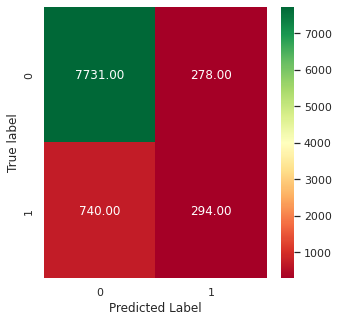

In [189]:
plot_cm(y_test,y_pred1)

In [191]:
294/(294+278)

0.513986013986014

In [199]:
294/(294+740)

0.28433268858800775

In [198]:
from sklearn.metrics import precision_score, recall_score, f1_score

In [195]:
precision_score(y_test,y_pred1)

0.513986013986014

In [197]:
recall_score(y_test,y_pred1)

0.28433268858800775

In [200]:
f1_score(y_test,y_pred1)

0.36612702366127026

Another useful tool for measuring performance is the ROC Curve.

In [245]:
from sklearn.metrics import roc_curve

In [235]:
y_pred_proba = pipeline.predict_proba(X_test)[::,1]

In [236]:
fpr, tpr, _ = roc_curve(y_test,y_pred_proba)

In [243]:
def plot_roc_curve(fpr,tpr,label=None):
  plt.plot(fpr, tpr, linewidth=2, label=label)
  plt.plot([0,1],[0,1], 'k--')
  plt.xlim([0.0, 1.0])
  plt.ylim([0.0, 1.0])

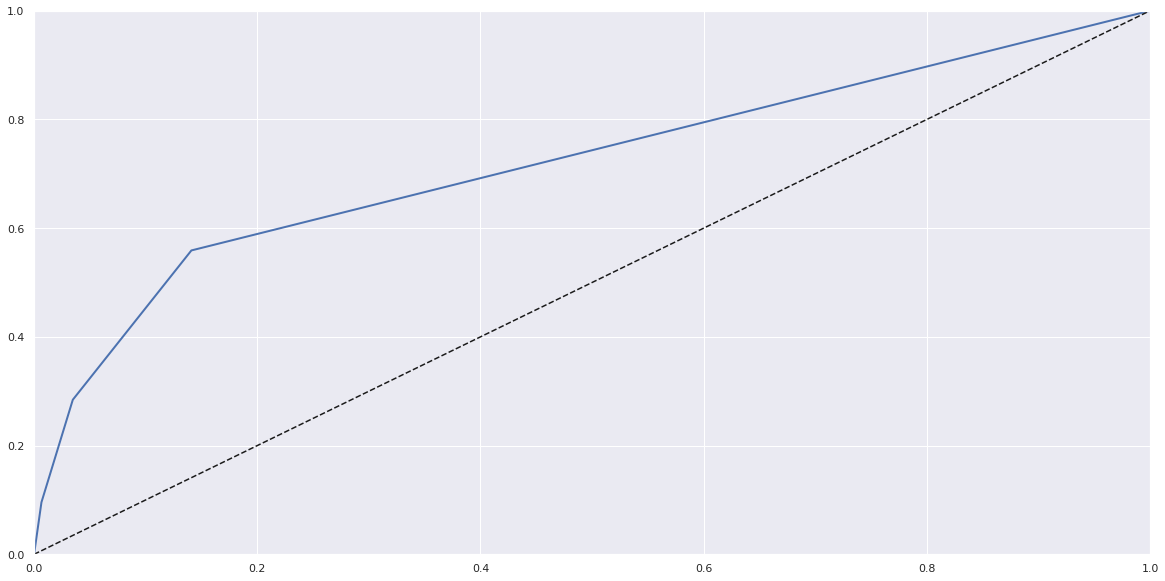

In [244]:
plot_roc_curve(fpr, tpr,"Label")

Another measure we can ues is the area under the curve in an ROC curve.  The higher the better.

In [248]:
from sklearn.metrics import roc_auc_score
print(roc_auc_score(y_test, y_pred_proba))

0.7200738627458035
